In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera, normaltest, boxcox, yeojohnson
from statsmodels.stats.diagnostic import lilliefors

In [2]:
df = pd.read_csv("dataset/autos.csv")

In [3]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
print("Dataset")
df.shape

Dataset


(371528, 21)

In [5]:
print("Dataset")
df.dtypes

Dataset


index                   int64
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [6]:
missing_values = df.isnull().sum()
print("Missing Values per Column:")
missing_values

Missing Values per Column:


index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [8]:
# Count of unique values in offerType
df.groupby('offerType').count()

,index,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
offerType,,,,,,,,,,,,,,,,,,,,
Angebot,371516,371516,371516,371516,371516,371516,333654,371516,351313,371516,351035,371516,371516,338137,371516,299462,371516,371516,371516,371516
Gesuch,12,12,12,12,12,12,5,12,6,12,9,12,12,5,12,6,12,12,12,12


In [9]:
# Count of unique values in seller
df.groupby('seller').count()

,index,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
seller,,,,,,,,,,,,,,,,,,,,
gewerblich,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3
privat,371525,371525,371525,371525,371525,371525,333656,371525,351316,371525,351041,371525,371525,338139,371525,299466,371525,371525,371525,371525


In [10]:
# Count of unique values in nrOfPictures
df.groupby('nrOfPictures').count()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
nrOfPictures,,,,,,,,,,,,,,,,,,,,
0,371528,371528,371528,371528,371528,371528,371528,333659,371528,351319,371528,351044,371528,371528,338142,371528,299468,371528,371528,371528


#### Irrelevant parameters
* offerType
* seller
* nrOfPictures

For each param one value dominates. Since each column has essentially one value, it is irrelevant as a param

In [12]:
# First remove the few rows affected
df = df.drop(df[(df['offerType'] == 'Gesuch') | (df['seller'] == 'gewerblich')].index, axis='index')

# Now remove the irrelevant columns
df = df.drop(['offerType', 'seller', 'nrOfPictures'], axis='columns')
df.dtypes

index                   int64
dateCrawled            object
name                   object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

In [13]:
df.shape

(371513, 18)

In [14]:
df.head()

,index,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [15]:
# Do not anything before split
df["yearOfRegistration"].sort_values(ascending=True).head(n=20)
print(df[df["yearOfRegistration"]<1886].count())
print('='*30)
print(df[df["yearOfRegistration"]>2025].count())

index                  68
dateCrawled            68
name                   68
price                  68
abtest                 68
vehicleType             0
yearOfRegistration     68
gearbox                10
powerPS                68
model                  34
kilometer              68
monthOfRegistration    68
fuelType               14
brand                  68
notRepairedDamage      10
dateCreated            68
postalCode             68
lastSeen               68
dtype: int64
index                  114
dateCrawled            114
name                   114
price                  114
abtest                 114
vehicleType              0
yearOfRegistration     114
gearbox                 28
powerPS                114
model                   68
kilometer              114
monthOfRegistration    114
fuelType                32
brand                  114
notRepairedDamage       16
dateCreated            114
postalCode             114
lastSeen               114
dtype: int64


```
# Sampling of original dataset to reduce large/impractical delays 
df_half = df.sample(frac=0.5, random_state=0)
df_half.shape
```

## Target Variable Analysis (`price`)

The dataset contains the price of the car (`price`) as the primary target variable. We can perform the following tasks as part of the EDA:

* Distribution of `price`:
    * Plot a histogram or density plot to observe the grade distribution.
    * Check for normality, skewness and outliers.
* Bin `price` into categories:
    * Create categories like "Low," "Average," and "High" performance to analyze patterns.

Text(0, 0.5, 'Frequency')

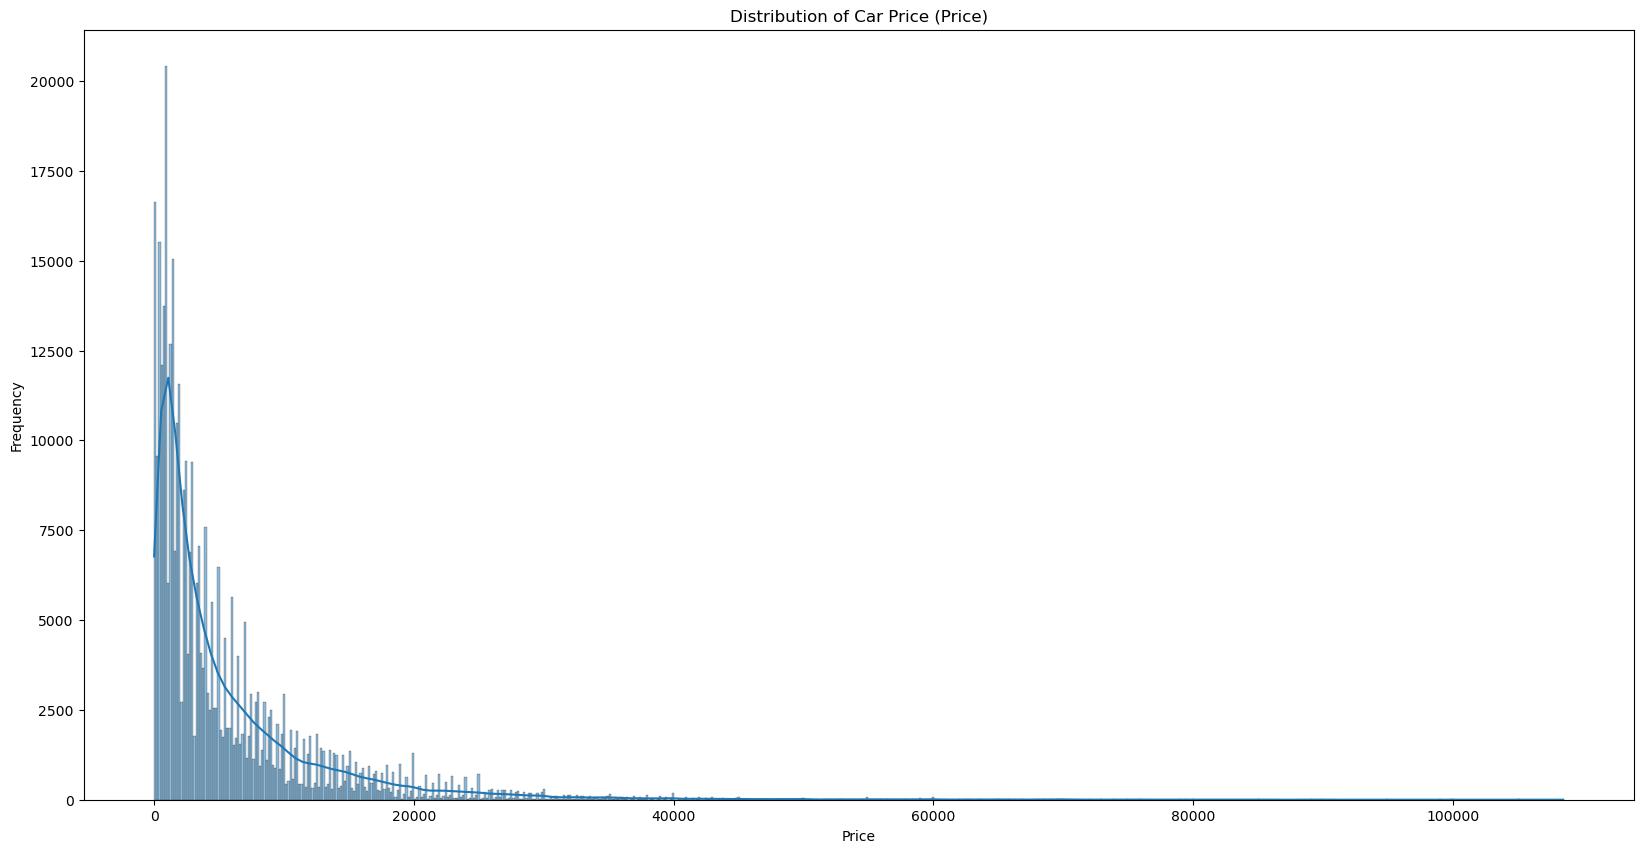

In [18]:
# distribution
# `price` has extreme values that make rendering the histogram impossible
# thus, we exclude them just for the chart
q_low, q_high = df['price'].quantile([0.001, 0.999])
df_trimmed = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df_trimmed['price'], kde=True)
ax.set_title("Distribution of Car Price (Price)")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

The target variable involves a large amount of outliers. Extreme outliers. This visual observation is confirmed by the following boxplot:

<Axes: ylabel='price'>

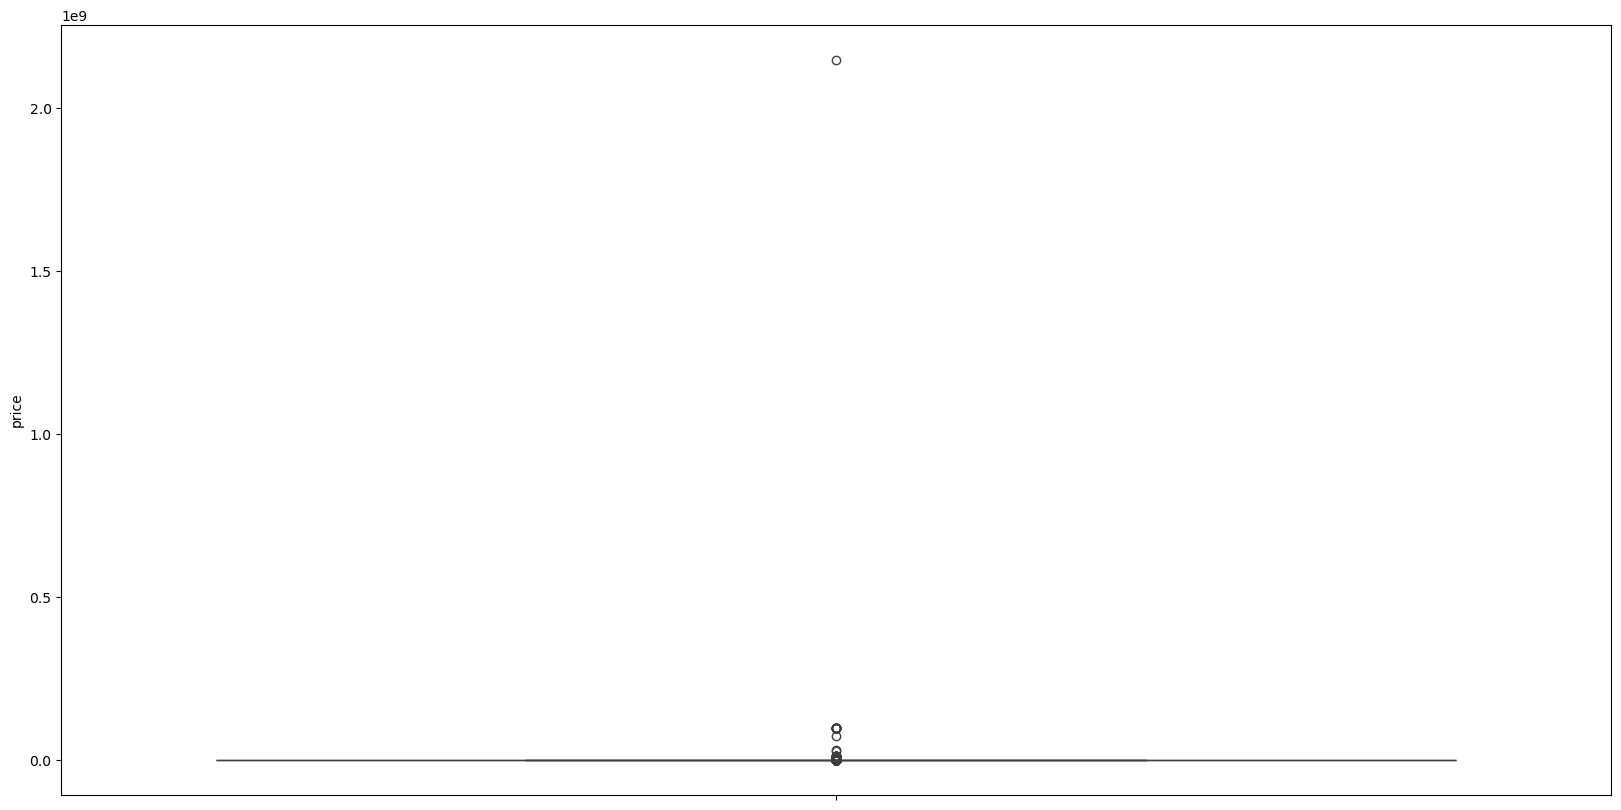

In [20]:
# boxplot
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, y='price')

<Axes: ylabel='price'>

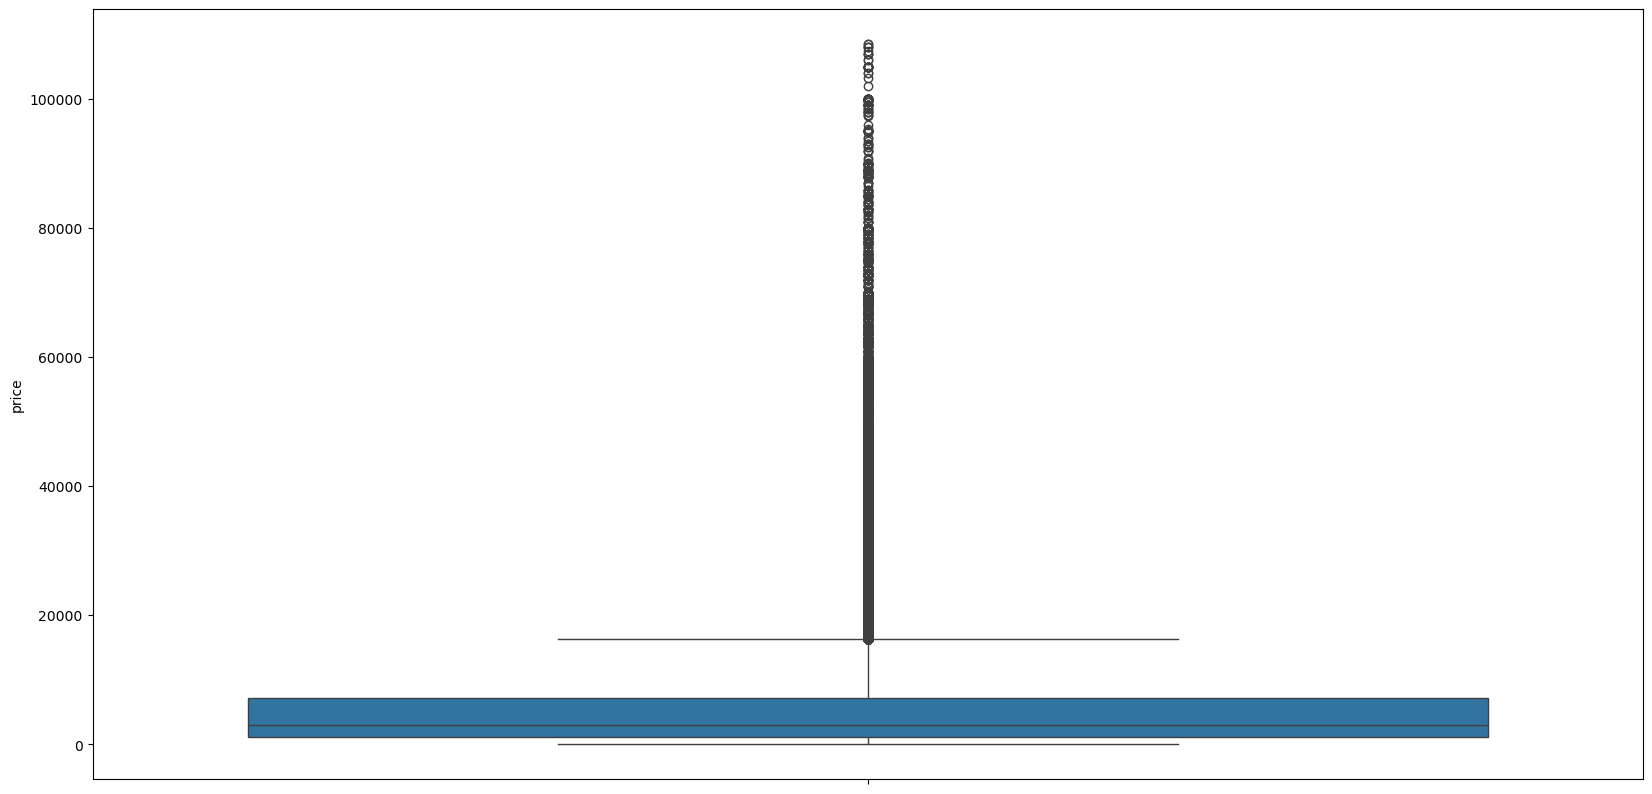

In [21]:
# boxplot
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_trimmed, y='price')

<Axes: ylabel='price'>

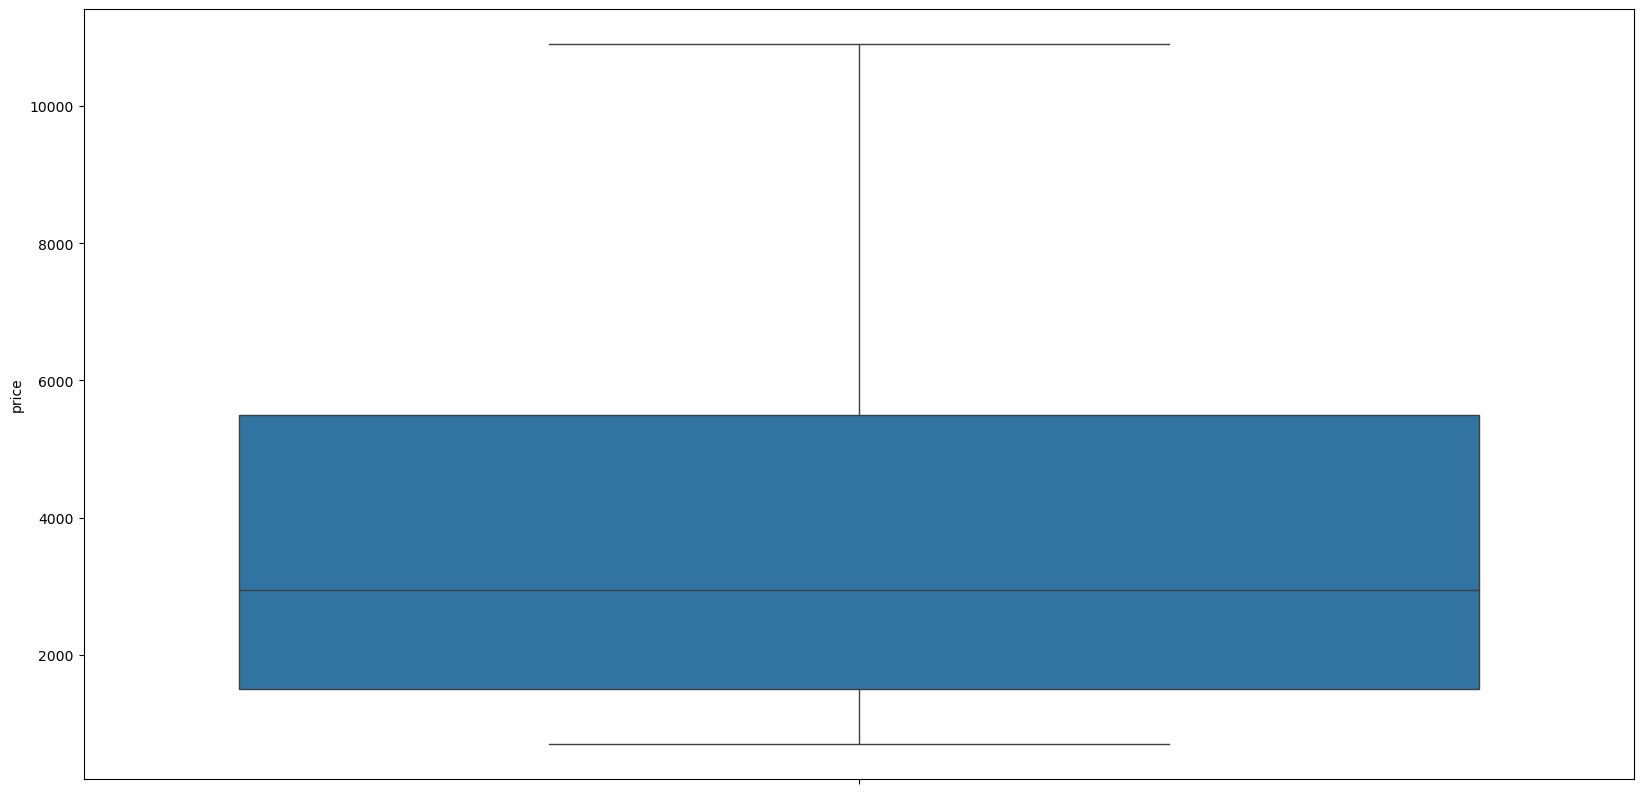

In [22]:
q_low, q_high = df['price'].quantile([0.15, 0.85])
df_trimmed = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_trimmed, y='price')

The target variable can be said that it does not follow the normal distribution based on the output of the normality tests shown below. All of them are

In [24]:
def run_normality_tests(data):
    """
    Perform various normality tests (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov, D'Agostino and Pearson, Jarque-Bera, and Lilliefors) on a given dataset.
    Choosing the Right Test:
        * For small sample sizes (< 50), the Shapiro-Wilk Test is recommended.
        * For larger samples, use the D’Agostino and Pearson’s Test or Jarque-Bera Test.
        * If you need critical values, use the Anderson-Darling Test.
        * Use the Kolmogorov-Smirnov Test or Lilliefors Test for additional validation, especially when comparing with a reference distribution.
    
    All tests compute a p-value. The p-value (probability value) is a statistical measure that helps you determine whether the observed data is consistent with a 
    null hypothesis. In the context of normality tests, the null hypothesis is usually: "The data follows a normal distribution."
    
    How to Interpret the p-value:
        * High p-value (>= 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the data might follow a normal distribution.
        * Low p-value (< 0.05): The null hypothesis is rejected. This indicates that the data does not follow a normal distribution.
        
    In Practice
        * If a test returns a p-value of 0.03, it means there is a 3% probability that the data could have arisen under the assumption of a normal distribution. In this case, you would reject the null hypothesis (assuming a 5% significance threshold).
        * If a test returns a p-value of 0.2, it suggests there is no strong evidence against the data being normal.

    Caveats
        * A high p-value does not prove normality, it simply suggests that the data is not inconsistent with a normal distribution.
        * A low p-value indicates a deviation from normality but does not specify the nature of that deviation (e.g., skewness, kurtosis).

    Parameters:
        data (array-like): The dataset to test for normality.

    Returns:
        dict: A dictionary containing test results with the test name, statistic, p-value, and whether the data is considered normal at a 5% significance level.
    """
    results = {}

    # Shapiro-Wilk Test
    try:
        stat, p = shapiro(data)
        results['Shapiro-Wilk Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Shapiro-Wilk Test'] = {'Error': str(e)}

    # Anderson-Darling Test
    try:
        result = anderson(data, dist='norm')
        results['Anderson-Darling Test'] = {
            'Statistic': result.statistic,
            'Critical Values': result.critical_values,
            'Significance Levels': result.significance_level,
            'Normal': result.statistic < result.critical_values[2]  # At 5% level
        }
    except Exception as e:
        results['Anderson-Darling Test'] = {'Error': str(e)}

    # Kolmogorov-Smirnov Test
    try:
        standardized_data = (data - np.mean(data)) / np.std(data)
        stat, p = kstest(standardized_data, 'norm')
        results['Kolmogorov-Smirnov Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Kolmogorov-Smirnov Test'] = {'Error': str(e)}

    # D’Agostino and Pearson’s Test
    try:
        stat, p = normaltest(data)
        results['D’Agostino and Pearson’s Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['D’Agostino and Pearson’s Test'] = {'Error': str(e)}

    # Jarque-Bera Test
    try:
        stat, p = jarque_bera(data)
        results['Jarque-Bera Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Jarque-Bera Test'] = {'Error': str(e)}

    # Lilliefors Test
    try:
        stat, p = lilliefors(data)
        results['Lilliefors Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Lilliefors Test'] = {'Error': str(e)}

    return results

In [25]:
results = run_normality_tests(df['price'])
for test, result in results.items():
    print(f"{test}: {result}")

Shapiro-Wilk Test: {'Statistic': 0.0002594097290427033, 'p-value': 3.094070603358749e-219, 'Normal': False}
Anderson-Darling Test: {'Statistic': 142863.78784574172, 'Critical Values': array([0.576, 0.656, 0.787, 0.918, 1.092]), 'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Normal': False}
Kolmogorov-Smirnov Test: {'Statistic': 0.49807694595155544, 'p-value': 0.0, 'Normal': False}
D’Agostino and Pearson’s Test: {'Statistic': 2413270.2645356734, 'p-value': 0.0, 'Normal': False}
Jarque-Bera Test: {'Statistic': 1846925273351852.8, 'p-value': 0.0, 'Normal': False}
Lilliefors Test: {'Statistic': 0.4980769485396755, 'p-value': 0.0009999999999998899, 'Normal': False}


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 371513.
  res = hypotest_fun_out(*samples, **kwds)


From the aforementioned resuts, **price deviates from normality**.

From the histogram and the kernel density estimate (KDE) curve shown above, we can say that the distribution appears to be fairly asymmetric around its left peak, which is approximately 0-2000. There is an extreme tail elongation on the right side. Since the distribution is approximately asymmetric, it suggests that the skewness value would be large. However, the exact skewness value would need to be calculated. Below, we are using the .skew() function to reveal if the target variable is skewed:

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and -0.5 or between 0.5 and 1, the data are moderately left-skewed or right-skewed respectively
* If the skewness is less than -1 or greater than 1, the data are highly left-skewed or right-skewed respectively

In [28]:
print('skewness:', df['price'].skew())

skewness: 578.0474145827042


As show above, the **target variable is extremely right-skewed**, therefore unskewing techniques such as Log, Sqrt, Box-Cox and Yeo-Johnson can be applied. Since `price` consists only of positive values, we can use every technique mentioned.

### Predicting values more than 200,000 and below 1,000 is not useful.
### In order to make our model effectively predict prices 1,000 - 200,000 we will exclude all rows with prices outside this range. 

In [31]:
print(df.shape)
df = df.drop(df[(df['price'] < 1000) | (df['price'] > 200000)].index, axis='index')
print(df.shape)

(371513, 18)
(288017, 18)


Text(0, 0.5, 'Frequency')

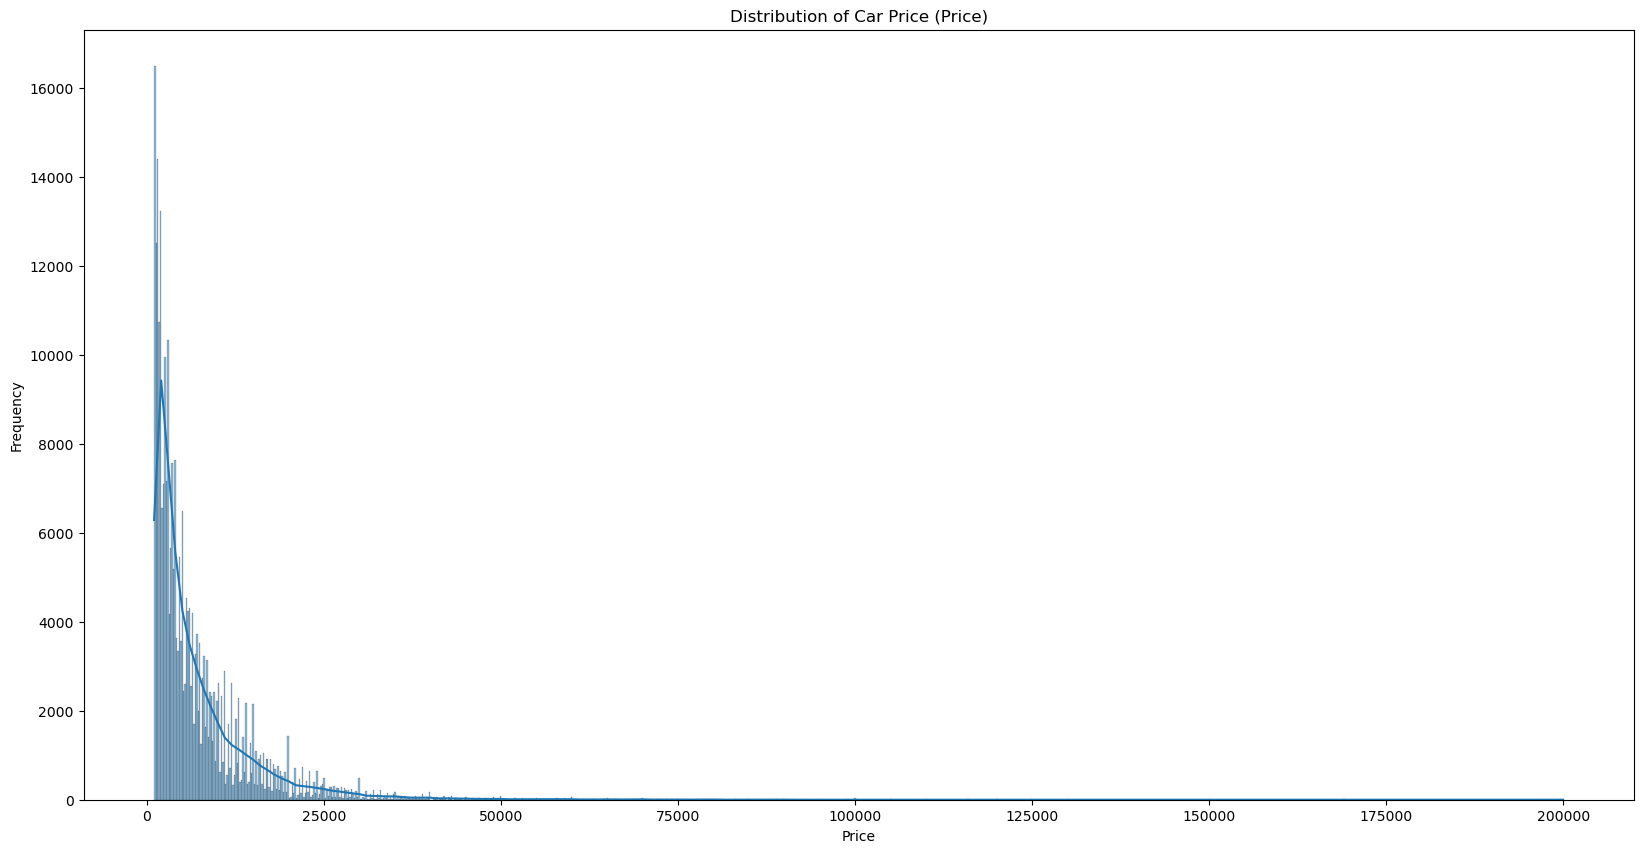

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df['price'], kde=True)
ax.set_title("Distribution of Car Price (Price)")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

In [33]:
bins = pd.cut(df['price'], bins=[0, 5000, 50000, np.inf], labels=["low", "average", "high"])
bins_df = pd.DataFrame({'price_category': bins})
bins_df

,price_category
1,average
2,average
3,low
4,low
6,low
...,...
371523,low
371524,low
371525,average
371526,low


Text(0, 0.5, 'Frequency')

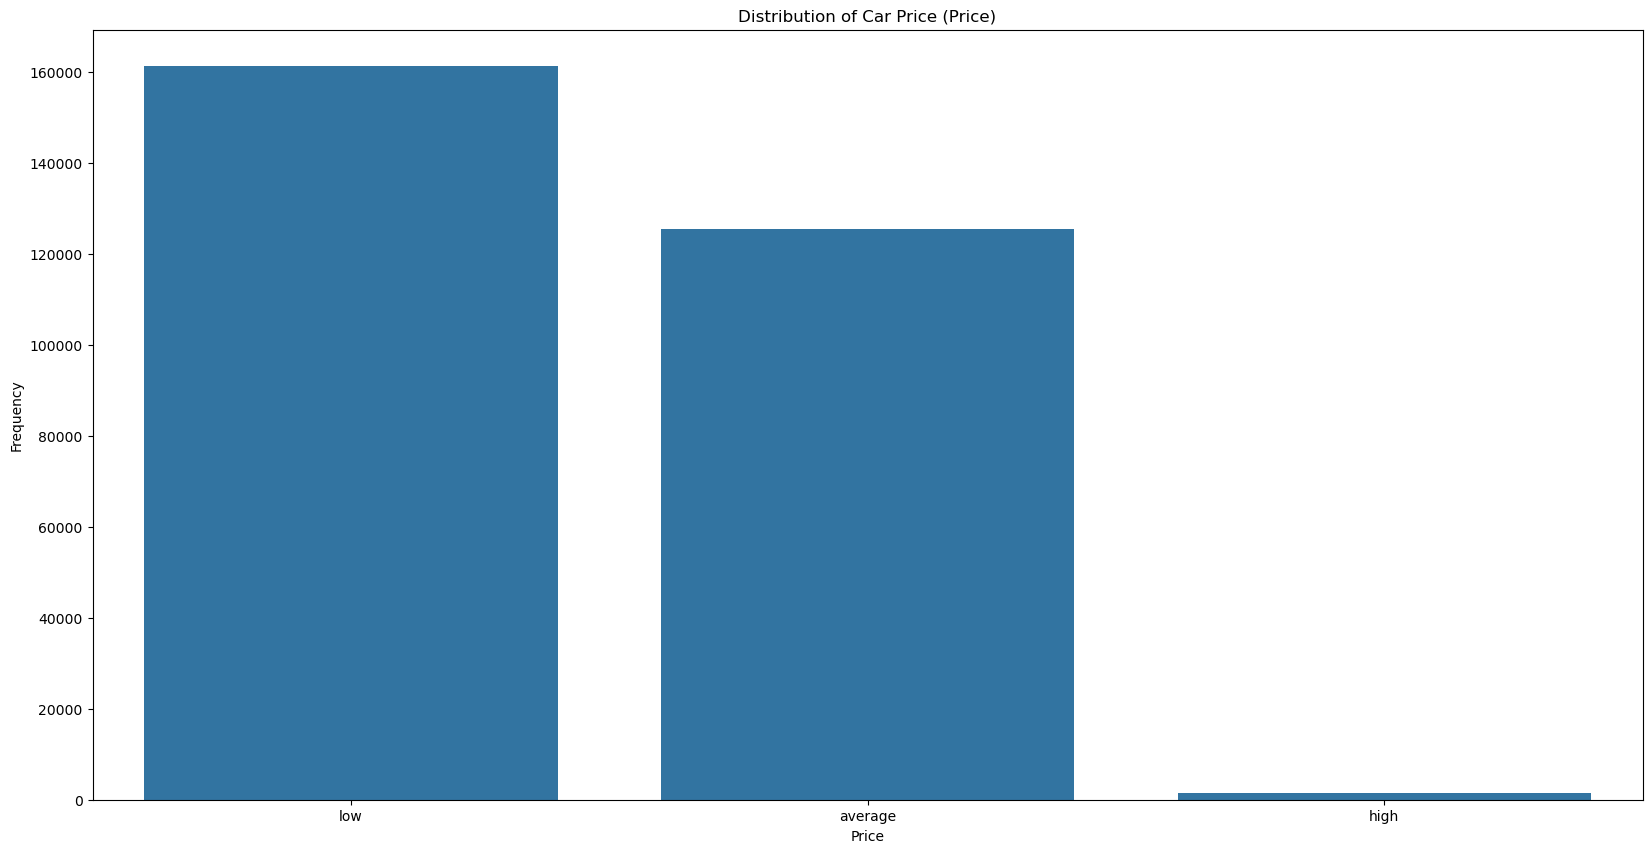

In [34]:
# distribution
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=bins_df, x="price_category")
ax.set_title("Distribution of Car Price (Price)")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

## Categorical Features Analysis

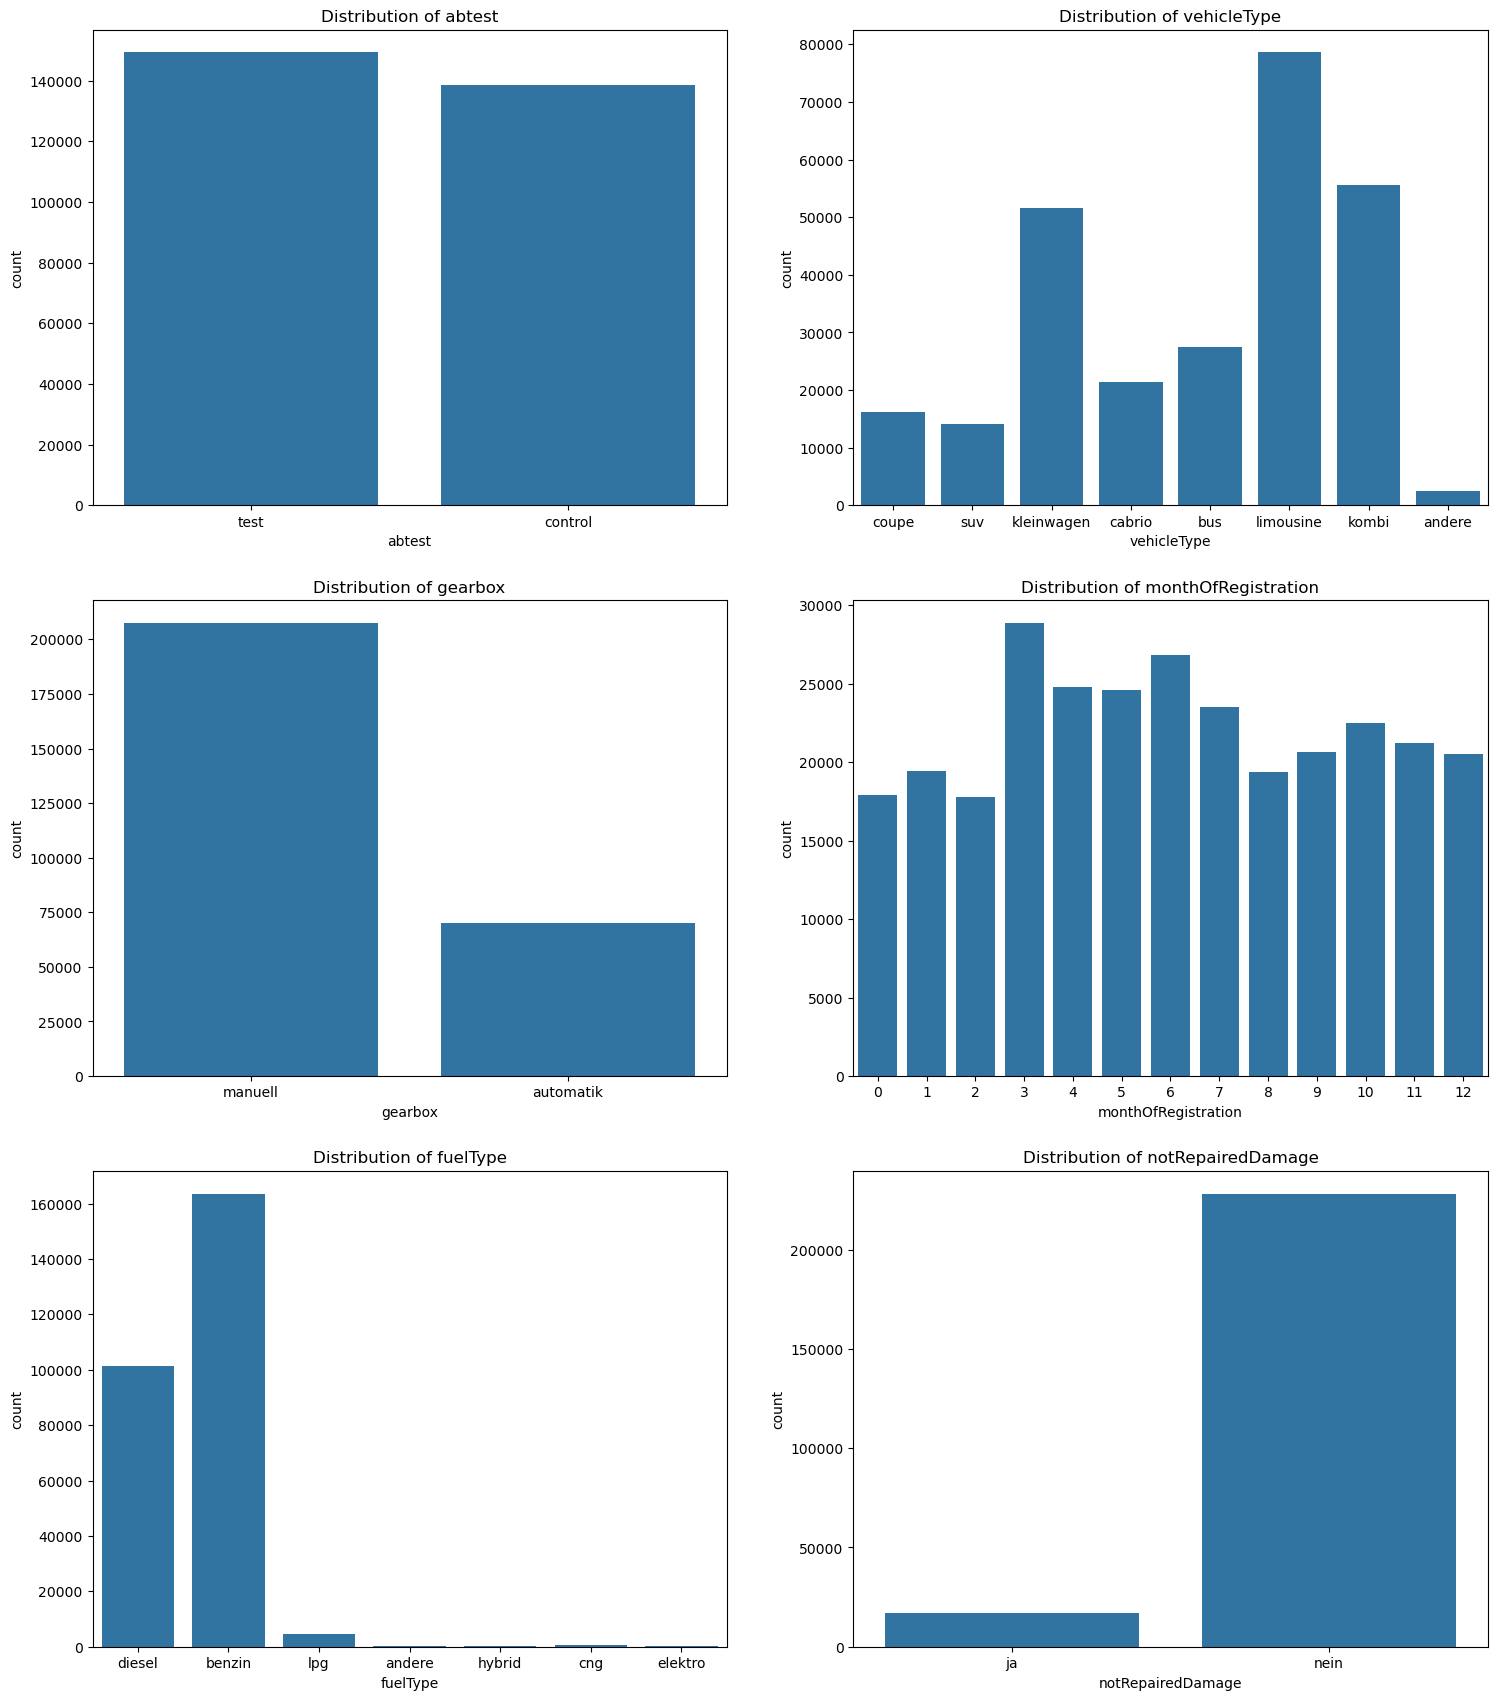

In [36]:
categorical_features = ['abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'notRepairedDamage']
nrows, ncols = 3, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))
i,j = 0,0
for feature in categorical_features:
    sns.countplot(x=feature, data=df, ax=axs[i,j])
    axs[i,j].set_title(f"Distribution of {feature}")
    j = j + 1
    if j % ncols == 0:
        i = i + 1
        j = 0

The bar plots shown above depict the distributions of several categorical variables in the dataset. Here are observations and insights for each feature:

1. ABtest (abtest)
   * both values (test and control) have similar distributions, while test appears more often
   * this variable can be useful for understanding the role of ABtest on price
2. Vehicle type (vehicleType)
   * three of the vehicle types dominate the distribution (kleinwagen, limousine, kombi)
   * the rest appear often enough to matter
   * andere appears too few times, perhaps oversampling could be used
3. gearbox (gearbox)
   * the majority of gearbox values are manuell, though a signifigant portion is automatik
   * the value of gearbox could help play a major role in determining the value of price
4. month of registration (monthOfRegistration)
   * each month has more or less similar amount of car registrations
   * months have 13th value, maybe 0 value is for null/NaN (dataset documentation does not specify)
5. fuel type (fuelType)
   * benzin appears, by far, the most often
   * desel appears often enough to impact learning
   * the rest of the values (lpg, andere, hybrid, cng, elektro) are extremely rare
6. not repaired damage (notRepairedDamage)
   * nein dominates as a value
   * ja does appear, though maybe not enough
   * this could impact training

#### General observations:
TODO: fill me in

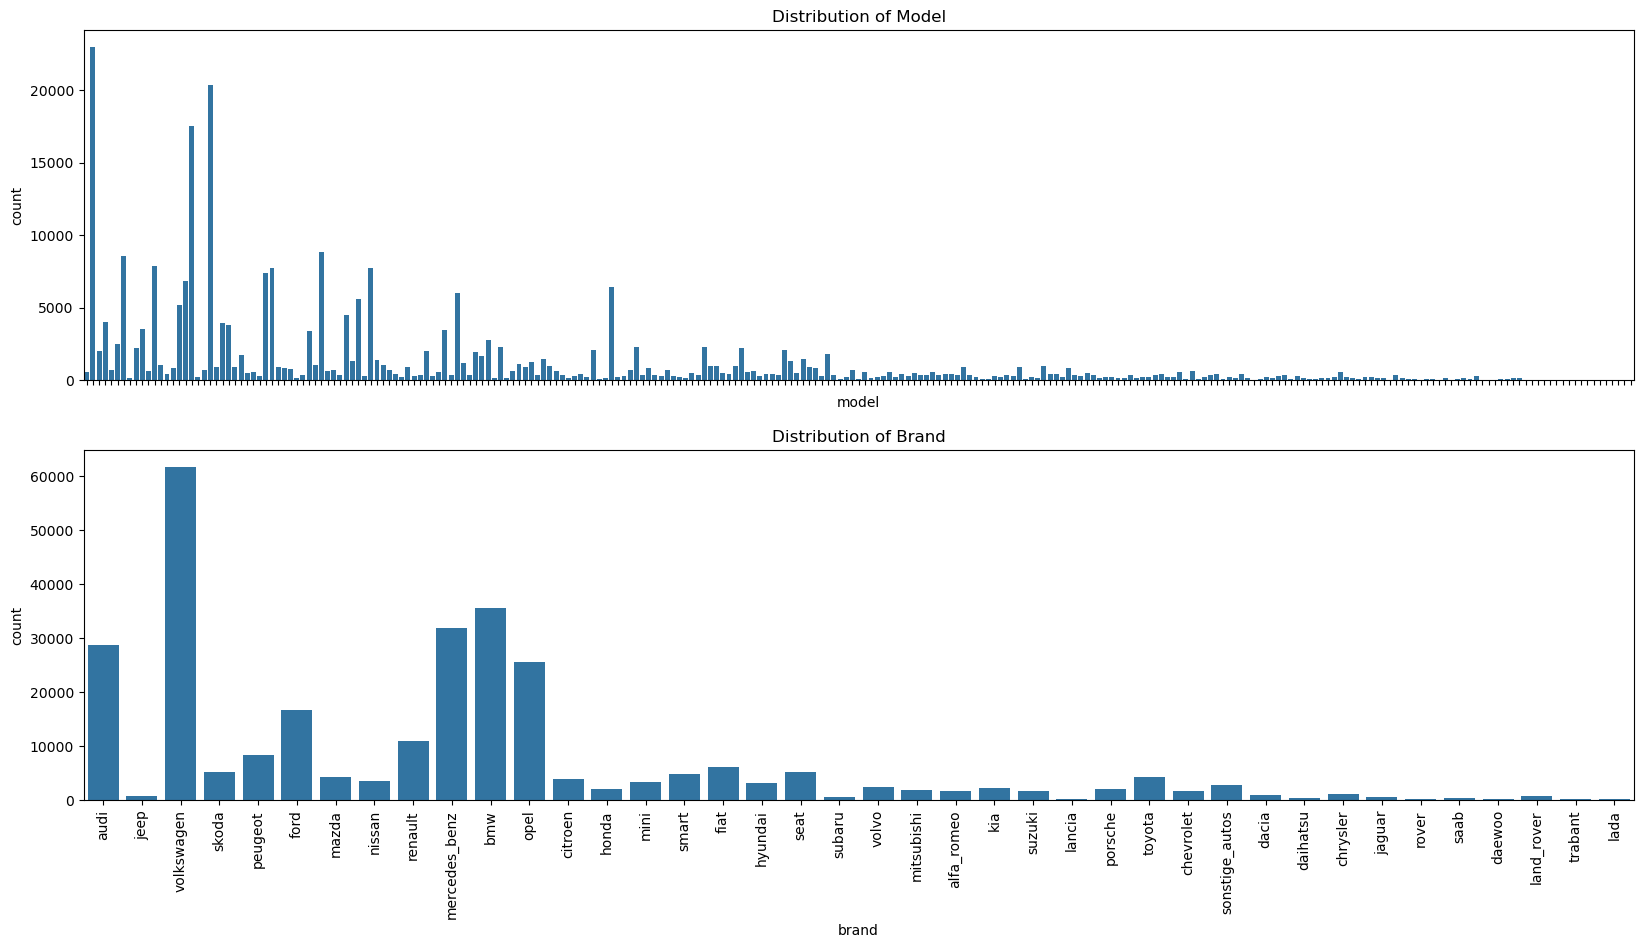

In [38]:
# model brand
nrows, ncols = 2, 1
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))

# Plot model distribution
sns.countplot(x='model', data=df, ax=axs[0])
axs[0].set_title("Distribution of Model")
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_xticklabels([])

sns.countplot(x='brand', data=df, ax=axs[1])
axs[1].set_title("Distribution of Brand")
axs[1].tick_params(axis='x', rotation=90)

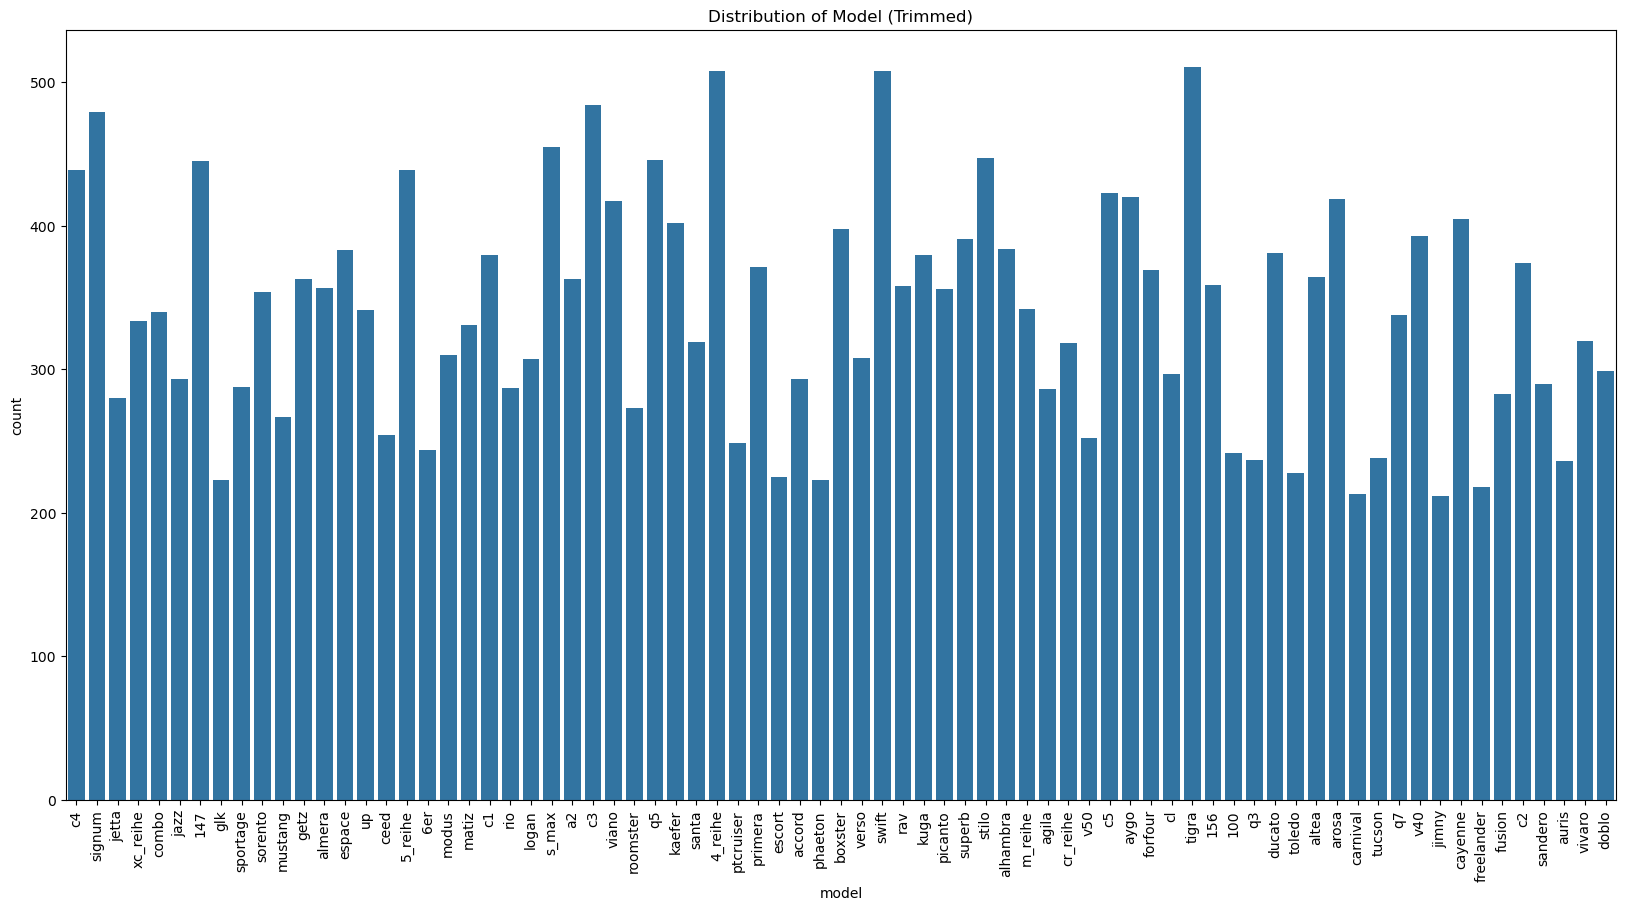

In [39]:

# Count how many times each model appears
model_counts = df['model'].value_counts()

# Determine quantile thresholds
q_low, q_high = model_counts.quantile([0.35, 0.65])

# Keep models within those frequency bounds
valid_models = model_counts[(model_counts >= q_low) & (model_counts <= q_high)].index

# Filter the DataFrame
df_trimmed = df[df['model'].isin(valid_models)]

# Plotting
nrows = 1
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))

# Model plot
sns.countplot(x='model', data=df_trimmed)
axs.set_title("Distribution of Model (Trimmed)")
axs.tick_params(axis='x', rotation=90)


## Numerical Features Analysis

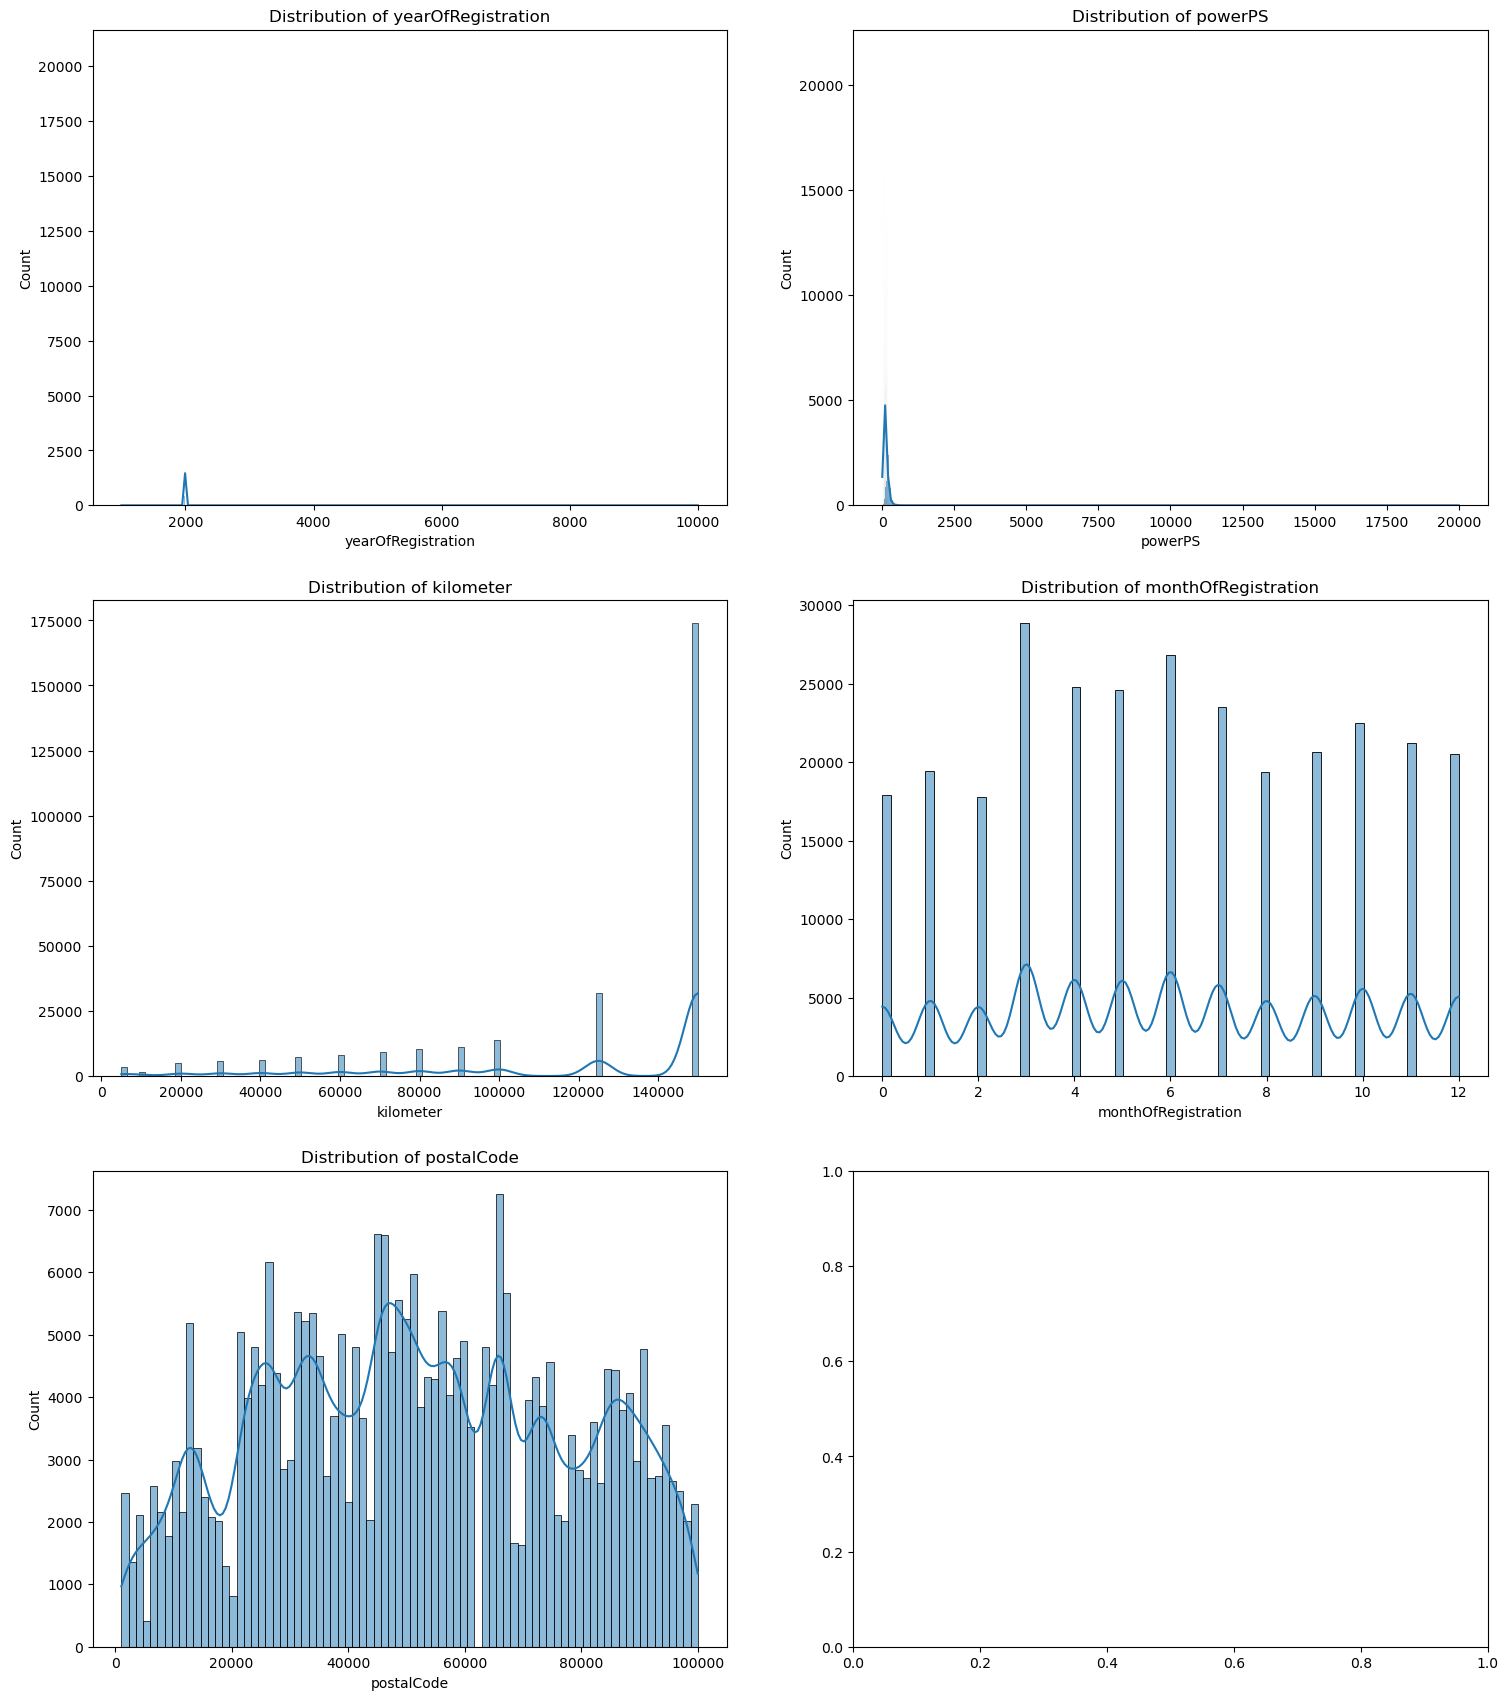

In [41]:
numerical_features = ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']
nrows,ncols = 3,2
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))
i,j = 0,0
for feature in numerical_features:
    sns.histplot(df[feature], kde=True, ax=axs[i,j])
    axs[i,j].set_title(f"Distribution of {feature}")
    j = j + 1
    if j % ncols == 0:
        i = i + 1
        j = 0